In [1]:
import numpy as np
import sympy as sym

In [2]:
sym.init_printing()

In [3]:
r = 3

In [4]:
d = sym.symbols("d", real=True)
d

In [5]:
psis = [sym.symbols(f"Psi_{2+2*c}") for c in range(r)]
psis

In [6]:
phisp = sym.symbols(" ".join([f"P_{{{r}}}" for r in range(r+1)]))
phisp

In [7]:
phism = sym.symbols(" ".join([f"P_{{{r}}}" for r in range(0, -r-1, -1)]))
phism

In [8]:
phis = phism[1:][::-1] + phisp
phis

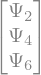

In [9]:
psi_vec = sym.Matrix([[psi] for psi in psis])
psi_vec

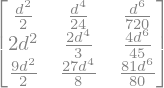

In [10]:
mat = list()
for a in range(1, r+1):
    row = list()
    for b in range(1, r+1):
        row.append(
            (a * d)**(2*b) / sym.factorial(2*b)
        )
    mat.append(row)
mat = sym.Matrix(mat)
mat

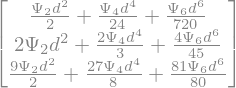

In [11]:
lhs = mat @ psi_vec
lhs

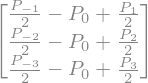

In [12]:
rhs = sym.Matrix([[(phism[k] - 2 * phisp[0] + phisp[k]) / 2] for k in range(1,r+1)])
rhs

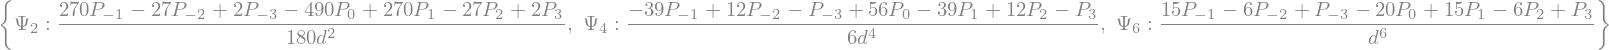

In [13]:
sol = sym.solve(lhs - rhs, psi_vec)
sol

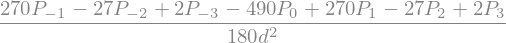

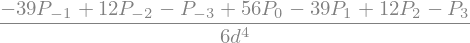

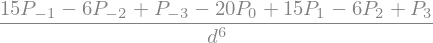

In [14]:
for key, val in sol.items():
    display(key, val)

# Extract solution & coefficients for 2nd derivative

In [15]:
d2psi = psi_vec[0]
d2psi

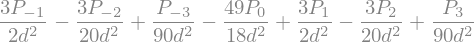

In [16]:
d2psi_sol = sol[d2psi].expand()
d2psi_sol

In [17]:
denoms = list()
coeffs = np.zeros(len(phis), dtype=float)
for i, phi in enumerate(phis):
    coeff_d2 = d2psi_sol.coeff(phi)
    coeff = coeff_d2 * d**2
    try:
        denoms.append(coeff.q)
    except AttributeError:
        pass
    print(f"φ_{i-r}: {coeff}")
    coeffs[i] = float(coeff)
lcm_A = float(sym.lcm(denoms))
print(f"Lowest common multiple: {lcm_A}")
coeffs *= float(lcm_A)
lcm_A, coeffs

φ_-3: 1/90
φ_-2: -3/20
φ_-1: 3/2
φ_0: -49/18
φ_1: 3/2
φ_2: -3/20
φ_3: 1/90
Lowest common multiple: 180.0


(180.0, array([   2.,  -27.,  270., -490.,  270.,  -27.,    2.]))

# Print array expression for 2nd derivative

In [18]:
A_line = f"1.0/{lcm_A} * np.{repr(coeffs.astype(int))}"
A_line

'1.0/180.0 * np.array([   2,  -27,  270, -490,  270,  -27,    2])'

# Determine coefficients in B matrix

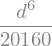

In [19]:
B_prefact = sym.Rational(2, sym.factorial(2*r + 2)) * d**(2*r)
B_prefact

In [20]:
psi_last = psis[-1]
psi_last

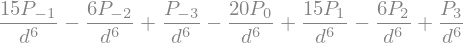

In [21]:
d2r_psi_sol = sol[psi_last].expand()
d2r_psi_sol

In [22]:
coeffs_B_raw = np.zeros(len(phis), dtype=float)
denoms_B = list()
for i, phi in enumerate(phis):
    coeff_d2r = B_prefact * d2r_psi_sol.coeff(phi)
    try:
        denoms_B.append(coeff_d2r.q)
    except AttributeError:
        pass
    coeffs_B_raw[i] = coeff_d2r
print(f"{denoms_B}")
lcm_B = float(sym.lcm(denoms_B))
print(f"LCM={lcm_B}")
coeffs_B = coeffs_B_raw.copy()
coeffs_B[r] = coeffs_B[r] + 1.0
coeffs_B *= float(lcm_B)
lcm_B, coeffs_B

[20160, 3360, 1344, 1008, 1344, 3360, 20160]
LCM=20160.0


(20160.0,
 array([ 1.000e+00, -6.000e+00,  1.500e+01,  2.014e+04,  1.500e+01,
        -6.000e+00,  1.000e+00]))

In [23]:
B_line = f"1.0/{lcm_B} * np.{repr(coeffs_B.astype(int))}"
B_line

'1.0/20160.0 * np.array([    1,    -6,    15, 20140,    15,    -6,     1])'